In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [15]:
# Load the dataset
df = pd.read_csv('SpotifyFeatures.csv')

# See the first 5 rows
print(df.head())

   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

In [16]:
features = [
    'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness',
    'tempo', 'valence'
]

In [17]:
X = df[features]

In [18]:
print(X)

        acousticness  danceability  duration_ms  energy  instrumentalness  \
0            0.61100         0.389        99373   0.910          0.000000   
1            0.24600         0.590       137373   0.737          0.000000   
2            0.95200         0.663       170267   0.131          0.000000   
3            0.70300         0.240       152427   0.326          0.000000   
4            0.95000         0.331        82625   0.225          0.123000   
...              ...           ...          ...     ...               ...   
232720       0.00384         0.687       326240   0.714          0.544000   
232721       0.03290         0.785       282447   0.683          0.000880   
232722       0.90100         0.517       166960   0.419          0.000000   
232723       0.26200         0.745       222442   0.704          0.000000   
232724       0.09730         0.758       323027   0.470          0.000049   

        liveness  loudness  speechiness    tempo  valence  
0         0.346

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
print(X_scaled[:5])

[[ 0.6833763  -0.89093479 -1.14136792  1.28690794 -0.48981852  0.66066116
   1.29070344 -0.36796995  1.5956073   1.38074423]
 [-0.34546718  0.19199369 -0.82186742  0.6302493  -0.48981852 -0.32283546
   0.66868254 -0.18308213  1.82325339  1.38843461]
 [ 1.6445698   0.58529607 -0.54529771 -1.66995381 -0.48981852 -0.56492694
  -0.7184024  -0.45583209 -0.5883258  -0.33421214]
 [ 0.94270123 -1.69370266 -0.69529478 -0.92978944 -0.48981852 -0.58762302
  -0.43481688 -0.43804404  1.75059694 -0.87638445]
 [ 1.6389323  -1.20342161 -1.28218355 -1.31315662 -0.08356649 -0.06561327
  -1.93060126 -0.40516312  0.74143285 -0.24961788]]


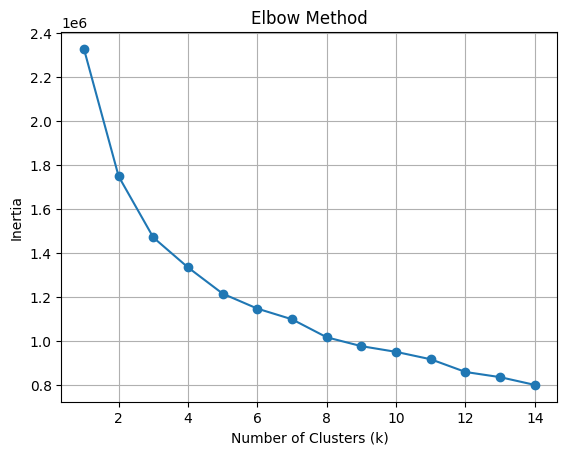

In [23]:
# Elbow method to find best number of clusters
inertia = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow
plt.plot(range(1, 15), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [24]:
k = 8

In [25]:
# Create final KMeans model with k=6
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataframe
df['cluster'] = kmeans.labels_

# Show a sample
print(df[['track_name', 'artist_name', 'cluster']].head())

                         track_name        artist_name  cluster
0       C'est beau de faire un Show     Henri Salvador        6
1  Perdu d'avance (par Gad Elmaleh)  Martin & les fées        6
2    Don't Let Me Be Lonely Tonight    Joseph Williams        3
3    Dis-moi Monsieur Gordon Cooper     Henri Salvador        3
4                         Ouverture       Fabien Nataf        3


In [27]:
# Recommendation Function
def recommend_song(song_name, data, scaler, kmeans_model, features, n_recs=5):
    # Find the song
    song = data[data['track_name'].str.lower() == song_name.lower()]
    if song.empty:
        print("Song not found in database!")
        return []
    
    # Scale the song features
    song_features = scaler.transform(song[features])
    
    # Predict the cluster
    cluster_label = kmeans_model.predict(song_features)[0]
    
    # Get songs from the same cluster
    recommendations = data[data['cluster'] == cluster_label]
    
    # Randomly pick n_recs songs
    recommendations = recommendations.sample(n=n_recs)
    
    return recommendations[['track_name', 'artist_name']]

In [29]:
recommendations = recommend_song('Marry You', df, scaler, kmeans, features)
print(recommendations)

               track_name           artist_name
211110  Rising Sun - Live  All Sons & Daughters
190775             Panic!            The Briggs
77816             Dragula            Rob Zombie
11131        I Am A River          Foo Fighters
87337            Magnolia         Playboi Carti


In [30]:
import joblib

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(kmeans, 'kmeans.pkl')

['kmeans.pkl']

In [31]:
df['cluster'] = kmeans.labels_
